In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [6]:
mnist_training_data = pd.read_csv("mnist_train.csv")
mnist_testing_data = pd.read_csv("mnist_test.csv")

In [7]:
mnist_training_data.shape

(60000, 785)

In [9]:
mnist_training_data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_testing_data.shape

(10000, 785)

In [10]:
mnist_testing_data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5
0
4
1
9


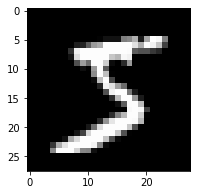

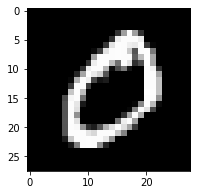

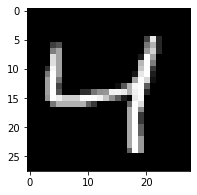

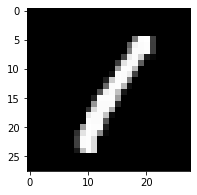

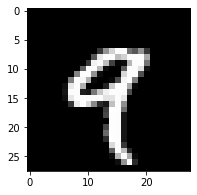

In [14]:
for i in range(5):
    tem_pixel=mnist_training_data.loc[i][1:]
    # plot MNIST numbers
    plt.figure(figsize=(3,3))
    grid_data = tem_pixel.values.reshape(28,28)
    plt.imshow(grid_data, cmap='gray')
    print(mnist_training_data.loc[i][0])

Text(0.5, 1.0, 'Distribution of MNIST Images (Training Set)')

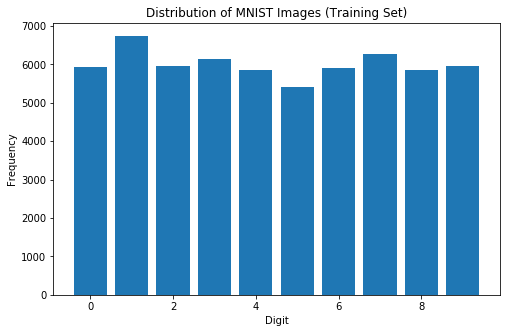

In [18]:
num_label=[0]*10
for num in mnist_training_data['label']:
    num_label[num] += 1
plt.figure(figsize=(8,5))
x = np.arange(10)
plt.bar(x, height=num_label)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images (Training Set)")

Text(0.5, 1.0, 'Distribution of MNIST Images (Testing Set)')

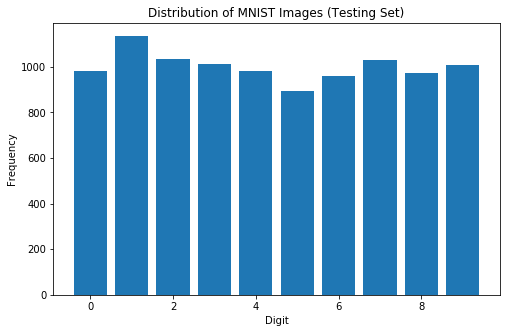

In [19]:
num_label=[0]*10
for num in mnist_testing_data['label']:
    num_label[num] += 1
plt.figure(figsize=(8,5))
x = np.arange(10)
plt.bar(x, height=num_label)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images (Testing Set)")

In [24]:
X_train = mnist_training_data.drop(['label'], axis='columns', inplace=False)
Y_train = mnist_training_data['label']
X_test = mnist_testing_data.drop(['label'], axis='columns', inplace=False)
Y_test = mnist_testing_data['label']

# 可以把30換成其他值，做比較

In [29]:
# Dimension Reduction
# 使用主成分分析(Principal components analysis，PCA)實現
pca = PCA(n_components=30)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
# 維度減完在進行辨識器的訓練前我們先對資料進行歸一化(normalization)的動作
# 把每一筆input data都除上255使其值落在0~1之間
# 很重要，一定要做
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))
# 維度降至30的版本，僅解釋掉了73%的變異

30
0.7305335038135315


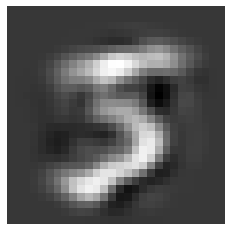

5


In [30]:
# 降到30維，所畫出的圖
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(30)

In [33]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.9886333333333334
測試資料辨識率: 0.9804


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(1)

In [34]:
pca = PCA(n_components=1)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

1
0.09704664353769663


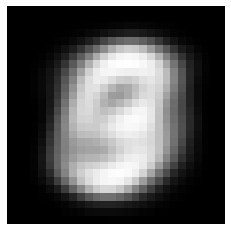

5


In [35]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [36]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.3060333333333333
測試資料辨識率: 0.3154


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(5)

In [37]:
pca = PCA(n_components=5)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

5
0.33227893674527365


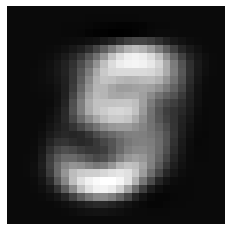

5


In [39]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [40]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.7647833333333334
測試資料辨識率: 0.7727


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(10)

In [41]:
pca = PCA(n_components=10)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

10
0.4881497471461397


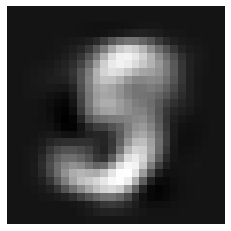

5


In [42]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [43]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.9434666666666667
測試資料辨識率: 0.9364


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(20)

In [44]:
pca = PCA(n_components=20)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

20
0.6435798167787931


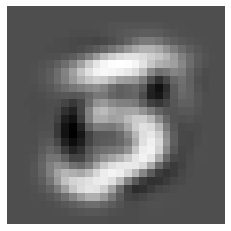

5


In [45]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [46]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.9826666666666667
測試資料辨識率: 0.9754


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(50)

In [47]:
pca = PCA(n_components=50)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

50
0.8246113567729584


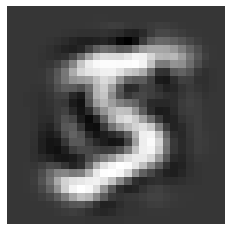

5


In [48]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [49]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.9914
測試資料辨識率: 0.9833


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(100)

In [50]:
pca = PCA(n_components=100)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

100
0.9143110830930877


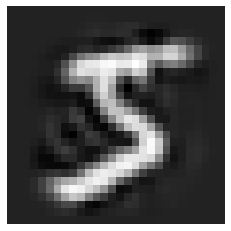

5


In [51]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [52]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.99275
測試資料辨識率: 0.9842


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(200)

In [53]:
pca = PCA(n_components=200)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

200
0.9660520683966816


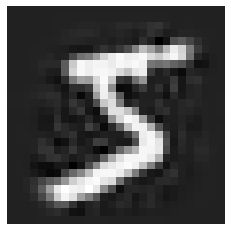

5


In [54]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [55]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.9936333333333334
測試資料辨識率: 0.983


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(400)

In [56]:
pca = PCA(n_components=400)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

400
0.9957684009344848


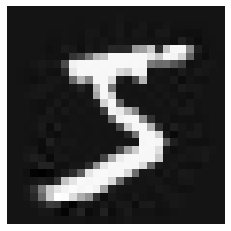

5


In [57]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [58]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.9940833333333333
測試資料辨識率: 0.9823


# 使用SVC(Support Vector Classification)進行模型的訓練與辨識
# SVC+PCA(500)

In [59]:
pca = PCA(n_components=500)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)
new_X_train = new_X_train/255
new_X_test = new_X_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

500
0.9992469649467585


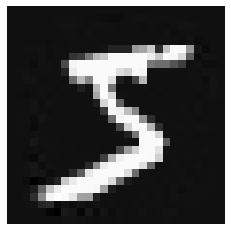

5


In [60]:
img = pca.inverse_transform(new_X_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [61]:
clf = SVC()
clf.fit(new_X_train, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(new_X_train) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(new_X_test) == Y_test))

訓練資料辨識率: 0.9941
測試資料辨識率: 0.9824
